In [1]:
import json
import matplotlib.pyplot as plt
import itertools
from pathlib import Path

In [2]:
# Path to the directory containing your JSON files
json_dir = Path("F:\Desktop\project\json")

# Load all JSON files
histories = {}
for file in json_dir.glob("*.json"):
    with open(file, "r") as f:
        histories[file.stem] = json.load(f)

In [4]:
# Compare models two by two
for (model1, hist1), (model2, hist2) in itertools.combinations(histories.items(), 2):
    epochs1 = range(1, len(hist1["best_train_loss"]) + 1)
    epochs2 = range(1, len(hist2["best_train_loss"]) + 1)

    plt.figure(figsize=(12, 5))

    # Loss comparison
    plt.subplot(1, 2, 1)
    plt.plot(epochs1, hist1["best_train_loss"], label=f"{model1} Train Loss")
    plt.plot(epochs1, hist1["best_val_loss"], label=f"{model1} Val Loss")
    plt.plot(epochs2, hist2["best_train_loss"], label=f"{model2} Train Loss", linestyle="--")
    plt.plot(epochs2, hist2["best_val_loss"], label=f"{model2} Val Loss", linestyle="--")
    plt.title("Loss Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy comparison
    plt.subplot(1, 2, 2)
    plt.plot(epochs1, hist1["best_train_accuracy"], label=f"{model1} Train Acc")
    plt.plot(epochs1, hist1["best_val_accuracy"], label=f"{model1} Val Acc")
    plt.plot(epochs2, hist2["best_train_accuracy"], label=f"{model2} Train Acc", linestyle="--")
    plt.plot(epochs2, hist2["best_val_accuracy"], label=f"{model2} Val Acc", linestyle="--")
    plt.title("Accuracy Comparison")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.suptitle(f"Comparison: {model1} vs {model2}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


TypeError: object of type 'float' has no len()

In [16]:
def compare_models(json_file1, json_file2, name1=None, name2=None):
    # Load both JSON files
    with open(json_file1, "r") as f1, open(json_file2, "r") as f2:
        model1 = json.load(f1)
        model2 = json.load(f2)

    # Use provided names, or fallback to filenames
    model1_name = name1 if name1 else json_file1.split("\\")[-1].replace(".json", "")
    model2_name = name2 if name2 else json_file2.split("\\")[-1].replace(".json", "")

    # Metrics to compare
    metrics = ["best_train_loss", "best_val_loss", "best_train_accuracy", "best_val_accuracy"]
    labels = ["Train Loss", "Val Loss", "Train Accuracy", "Val Accuracy"]

    model1_values = [model1[m] for m in metrics]
    model2_values = [model2[m] for m in metrics]

    x = range(len(metrics))  # positions for bars
    width = 0.35

    plt.figure(figsize=(8, 5))
    plt.bar([i - width/2 for i in x], model1_values, width, label=model1_name)
    plt.bar([i + width/2 for i in x], model2_values, width, label=model2_name)

    plt.xticks(x, labels)
    plt.ylabel("Value")
    plt.title(f"Comparison: {model1_name} vs {model2_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [11]:
cnn_cifar = r"F:\Desktop\project\json\results_cnn_cifar_model.json"
cnn_combined = r"F:\Desktop\project\json\results_cnn_combined_model.json"
cnn64_cifar = r"F:\Desktop\project\json\results_cnn64_cifar_model.json"
vgg16_cifar = r"F:\Desktop\project\json\results_vgg_cifar_model.json"
vgg16_combined = r"F:\Desktop\project\json\results_vgg16_combined_model.json"

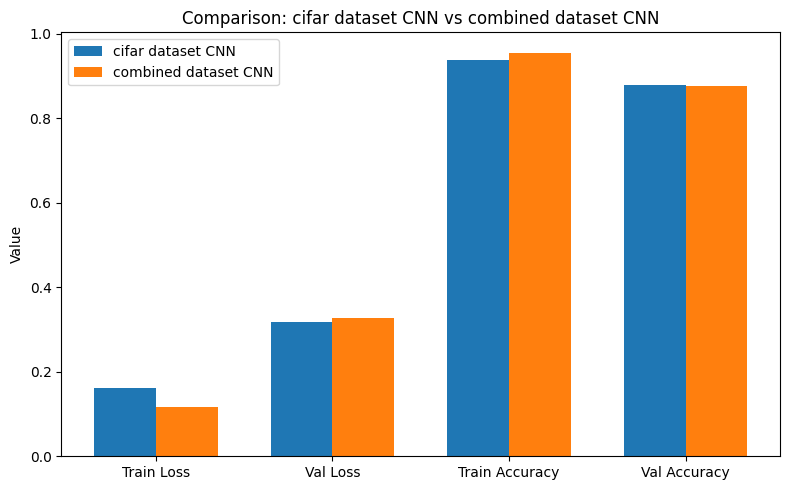

In [17]:
compare_models(cnn_cifar, cnn_combined, name1= "cifar dataset CNN", name2="combined dataset CNN")

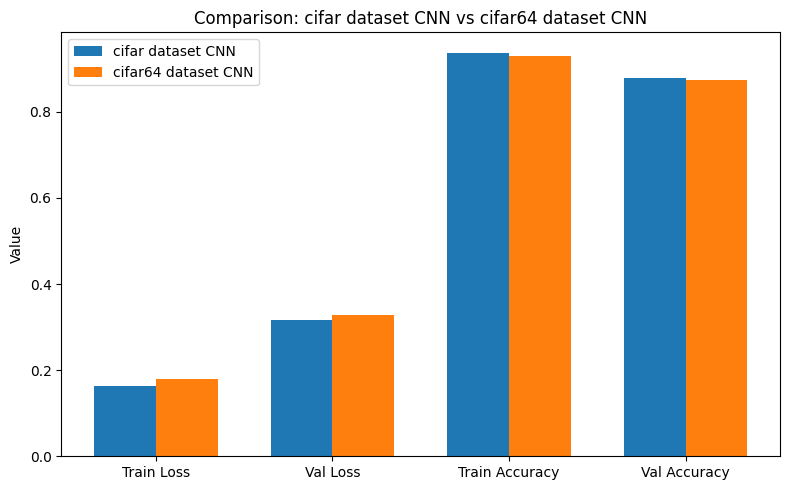

In [18]:
compare_models(cnn_cifar, cnn64_cifar, name1= "cifar dataset CNN", name2="cifar64 dataset CNN")

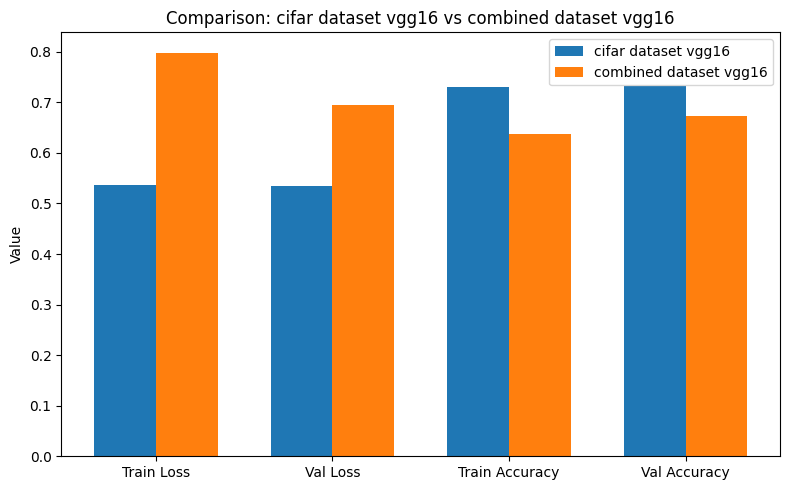

In [19]:
compare_models(vgg16_cifar, vgg16_combined, name1= "cifar dataset vgg16", name2="combined dataset vgg16")

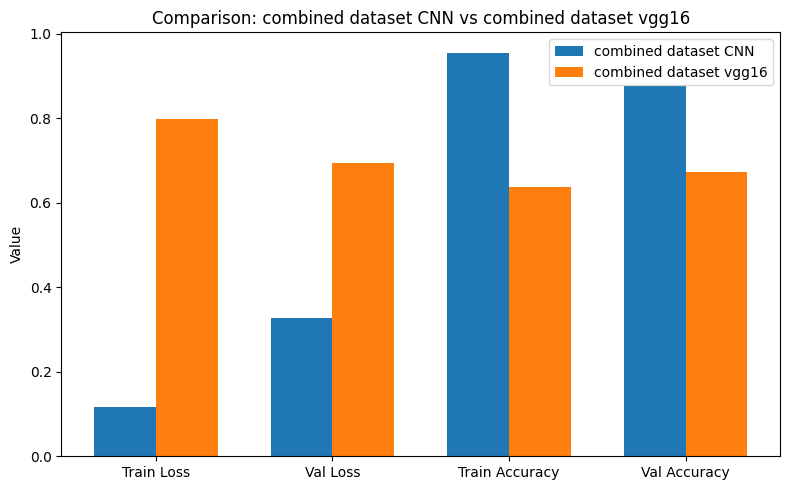

In [20]:
compare_models(cnn_combined, vgg16_combined, name1= "combined dataset CNN", name2="combined dataset vgg16")

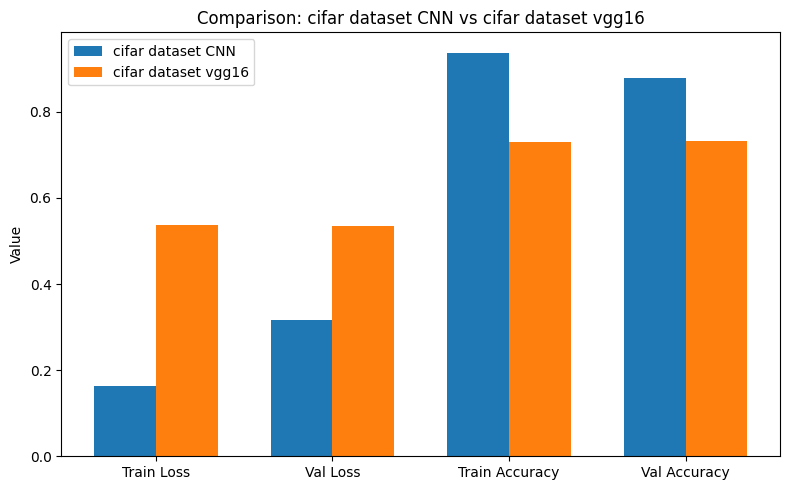

In [21]:
compare_models(cnn_cifar, vgg16_cifar, name1= "cifar dataset CNN", name2="cifar dataset vgg16")